In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import re
from scipy.sparse import csr_matrix

In [2]:
from lightfm import LightFM

In [3]:
recipes=pd.read_csv('Downloads\\food_dataset\\RAW_recipes.csv')
ratings=pd.read_csv('Downloads\\food_dataset\\RAW_interactions.csv')

#books.columns=['ISBN','Book_title','book_author','year_of_publication','publisher','img_url_s','img_url_m','img_url_l']
#users=pd.read_csv('Downloads\\archive\\food_dataset\\RAW_interactions.csv',sep=',' , error_bad_lines= False , encoding= "latin-1")
#users.columns=['user_id','location','age']
ratings.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [4]:
df=ratings.merge(recipes,left_on='recipe_id',right_on='id',how='left')
df.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  \
0  Great with a salad. Cooked on top of stove for...   
1  So simple, so delicious! Great for chilly fall...   
2  This worked very well and is EASY.  I used not...   
3  I made the Mexican topping and took it to bunk...   
4  Made the cheddar bacon topping, adding a sprin...   

                                   name     id  minutes  contributor_id  \
0  white bean   green chile pepper soup  40893      495            1533   
1  white bean   green chile pepper soup  40893      495            1533   
2      devilicious cookie cake delights  44394       20           56824   
3                 baked potato toppings  85009       10           64342   
4                 baked potato toppings  85009       10           64342   

    submitted                                               tags  \
0  2002-09-21  ['weeknight', 'time-to-make', 'course', 'main-...   
1  2002-09-21  ['weeknight', 'time-to-make', 'course', 'main-...   
2  2002-10-27  ['30-minutes-or-less', 'time-to-make', 'course...   
3  2004-02-25  ['15-minutes-or-less', 'time-to-make', 'course...   
4  2004-02-25  ['15-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
0           [204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]        4   
1           [204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]        4   
2           [132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]        5   
3  [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   
4  [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   

                                               steps  \
0  ['combine beans , onion , chilies , 1 / 2 teas...   
1  ['combine beans , onion , chilies , 1 / 2 teas...   
2  ['blend together cake mix , oil and eggs', 'ad...   
3  ['pick whichever topping you want to use and c...   
4  ['pick whichever topping you want to use and c...   

                                         description  \
0                        easy soup for the crockpot.   
1                        easy soup for the crockpot.   
2                                                NaN   
3  these toppings sure makes a nice change from p...   
4  these toppings sure makes a nice change from p...   

                                         ingredients  n_ingredients  
0  ['great northern beans', 'yellow onion', 'dice...              9  
1  ['great northern beans', 'yellow onion', 'dice...              9  
2  ["devil's food cake mix", 'vegetable oil', 'eg...              4  
3  ['mayonnaise', 'salsa', 'cheddar cheese', 'ref...             13  
4  ['mayonnaise', 'salsa', 'cheddar cheese', 'ref...             13

In [5]:
df1=df[['user_id','rating','name']]
dff=df[['user_id','rating','name','tags']]
dff1=dff.head(10000)

In [6]:
df1=df1.drop_duplicates()

In [7]:
#df_pivot= df1.pivot(index='name',columns='user_id',values='rating').fillna(0)
df2=df1.head(10000)

In [8]:
df2['rating'].unique()

array([4, 5, 0, 2, 3, 1], dtype=int64)

In [9]:
df_pivot= df2.pivot(index='name',columns='user_id',values='rating').fillna(0)
df_matrix=csr_matrix(df_pivot.values)

In [10]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric ='cosine' , algorithm ='brute')
model_knn.fit(df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [11]:
query_index =df_pivot.shape[0]
df_pivot.head()                    

user_id                                             1535        1676        \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             2310        2312        \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             2625        3288        \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             3385        3678        \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             4005        4291        \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             ...  2002290281  \
name                                                ...               
100 year old old fashioned cream pie                ...         0.0   
1789  apple  arugula salad with aged gouda and ...  ...         0.0   
1900 park fare bread pudding  disney                ...         0.0   
2 ingredient peach sorbet                           ...         0.0   
2 tomato pasta salad                                ...         0.0   

user_id                                             2002294362  2002303474  \
name                                                                         
100 year old old fashioned cream pie                       0.0         0.0   
1789  apple  arugula salad with aged gouda and ...         0.0         0.0   
1900 park fare bread pudding  disney                       0.0         0.0   
2 ingredient peach sorbet                                  0.0         0.0   
2 tomato pasta salad                                       0.0         0.0   

user_id                                             2002303484  2002305233  \
name                                                                         
100 year old old fashioned cream pie                       0.0  

In [12]:
#TAKING THE BOOK TITLE INDEX NUMBER AS A VECTOR AND COMPARING THAT VECTOR WITH OTHER VECTORS AND FINDING NEAREST 5 VECTORS
#query_index =2378
query_index =np.random.choice(df_pivot.shape[0])
distances , indices =model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for garlic thyme focaccia:

1: garlic thyme focaccia, with distance of 0.0:
2: chickpea salad  ensalada de garbanzas, with distance of 0.29289321881345254:
3: toffee apple turnover pie, with distance of 0.6286093236458963:
4: spiced cappuccino, with distance of 0.6666666666666667:
5: fresh cream of asparagus soup from the farm, with distance of 0.7774340463701371:


In [13]:
pd.set_option("display.max_columns", None)
dff.head()

user_id  rating                                  name  \
0    38094       4  white bean   green chile pepper soup   
1  1293707       5  white bean   green chile pepper soup   
2     8937       4      devilicious cookie cake delights   
3   126440       5                 baked potato toppings   
4    57222       5                 baked potato toppings   

                                                tags  
0  ['weeknight', 'time-to-make', 'course', 'main-...  
1  ['weeknight', 'time-to-make', 'course', 'main-...  
2  ['30-minutes-or-less', 'time-to-make', 'course...  
3  ['15-minutes-or-less', 'time-to-make', 'course...  
4  ['15-minutes-or-less', 'time-to-make', 'course...

In [14]:
dff.iloc[8][3]

"['60-minutes-or-less', 'time-to-make', 'main-ingredient', 'preparation', 'healthy', 'poultry', 'low-fat', 'chicken', 'dietary', 'low-saturated-fat', 'high-protein', 'high-in-something', 'low-in-something', 'meat']"

In [15]:
dff.iloc[80][2]

'mom s upside down pizza'

In [9]:
dff2=dff1[['name','tags']]
dff2=dff2.drop_duplicates()
dff2=dff2.reset_index()

In [10]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace("'", " ").replace("[", " ").replace("]", " ").replace("-", " ").replace(",", " "))
        else:
            return ""
        
dff2['tags'] = dff2['tags'].apply(clean_data)
#dff2['']
dff2.head()

index                                  name  \
0      0  white bean   green chile pepper soup   
1      2      devilicious cookie cake delights   
2      3                 baked potato toppings   
3      5                   sugared raspberries   
4      8                  kfc honey bbq strips   

                                                tags  
0    weeknight    time to make    course    main ...  
1    30 minutes or less    time to make    course...  
2    15 minutes or less    time to make    course...  
3    15 minutes or less    time to make    course...  
4    60 minutes or less    time to make    main i...

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [12]:
vector = cv.fit_transform(dff2['tags']).toarray()

In [13]:
vector1= cv.fit_transform(dff2['tags']).toarray()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.2845552 , 0.4738791 , ..., 0.31859655, 0.33769082,
        0.31022669],
       [0.2845552 , 1.        , 0.32025631, ..., 0.19138975, 0.16853002,
        0.20965697],
       [0.4738791 , 0.32025631, 1.        , ..., 0.27888668, 0.23388214,
        0.3927922 ],
       ...,
       [0.31859655, 0.19138975, 0.27888668, ..., 1.        , 0.68138514,
        0.28690229],
       [0.33769082, 0.16853002, 0.23388214, ..., 0.68138514, 1.        ,
        0.28708463],
       [0.31022669, 0.20965697, 0.3927922 , ..., 0.28690229, 0.28708463,
        1.        ]])

In [19]:
def recommend(name1):
    index = dff2[dff2['name'] == name1].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])[1:6]
    print(distances)
    for i in distances:
        #print(dff2.iloc[i[0]].name)
        print(dff2.loc[i[0],'name']) 

In [20]:
recommend('mom s upside down pizza')

21


Feature: 0, Score: 0.04920
Feature: 1, Score: 0.06040
Feature: 2, Score: 0.04880
Feature: 3, Score: 0.09060
Feature: 4, Score: 0.05080
Feature: 5, Score: 0.05160
Feature: 6, Score: 0.07520
Feature: 7, Score: 0.05320
Feature: 8, Score: 0.05320
Feature: 9, Score: 0.02980


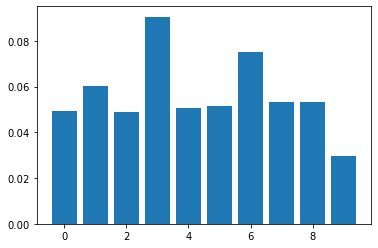

In [27]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [28]:
deff=df[['name','rating','recipe_id','user_id']]
bav=deff.head(50000)
bav.head()

name  rating  recipe_id  user_id
0  white bean   green chile pepper soup       4      40893    38094
1  white bean   green chile pepper soup       5      40893  1293707
2      devilicious cookie cake delights       4      44394     8937
3                 baked potato toppings       5      85009   126440
4                 baked potato toppings       5      85009    57222

In [29]:
zxyz=deff.head(50000)

In [30]:
zxyz.shape

(50000, 4)

In [31]:
zxyz.head()

name  rating  recipe_id  user_id
0  white bean   green chile pepper soup       4      40893    38094
1  white bean   green chile pepper soup       5      40893  1293707
2      devilicious cookie cake delights       4      44394     8937
3                 baked potato toppings       5      85009   126440
4                 baked potato toppings       5      85009    57222

In [32]:
a11=zxyz.groupby(['name'])['rating'].sum().to_frame('total_rating').reset_index()
a111=zxyz.groupby(['name'])['user_id'].count().to_frame('rating-count').reset_index()
a111.head(1)

name  rating-count
0  1 dish hot fudge swirl cake             2

In [33]:
zxyz.drop('user_id', axis=1, inplace=True)

In [34]:
a2=zxyz.drop_duplicates()

In [35]:
a123=a2.merge(a11,on='name',how='left')

In [36]:
a1234=a123.merge(a111,on='name',how='left')

In [37]:
a1234['rating-avg']= a1234['total_rating']/a1234['rating-count']

In [38]:
a1234['rating-avg']=a1234['rating-avg'].round()

In [39]:
a1234.drop_duplicates()

name  rating  recipe_id  \
0               white bean   green chile pepper soup       4      40893   
1               white bean   green chile pepper soup       5      40893   
2                   devilicious cookie cake delights       4      44394   
3                              baked potato toppings       5      85009   
4                                sugared raspberries       4     120345   
...                                              ...     ...        ...   
15600                      simple grilled pork chops       5     336098   
15601  cape malay type slightly spiced baked custard       5     435153   
15602          calabacitas    mexican style zucchini       4     488275   
15603                               taffy apple cake       5      67192   
15604                               taffy apple cake       3      67192   

       total_rating  rating-count  rating-avg  
0                 9             2         4.0  
1                 9             2         4.0  
2                 4             1         4.0  
3                10             2         5.0  
4                 6             3         2.0  
...             ...           ...         ...  
15600            10             2         5.0  
15601             5             1         5.0  
15602             4             1         4.0  
15603            27             6         4.0  
15604            27             6         4.0  

[15605 rows x 6 columns]

In [40]:
item_dict ={}
df =zxyz[['recipe_id','name']].sort_values('recipe_id').reset_index()

for i in range(df.shape[0]):
    item_dict[(df.loc[i,'recipe_id'])] = df.loc[i,'name']

In [41]:
a12345=a1234[['name','rating-avg']]

In [42]:
books_metadata_selected_transformed = pd.get_dummies(a12345, columns = ['rating-avg'])

books_metadata_selected_transformed = books_metadata_selected_transformed.sort_values('name').reset_index().drop('index', axis=1)
books_metadata_selected_transformed.drop_duplicates()

name  rating-avg_0.0  \
0                            1 dish hot fudge swirl cake               0   
1             1 minute  no bake  chocolatey cereal bites               0   
2                   100 year old old fashioned cream pie               0   
3                       1000 island style salad dressing               0   
4                                       110 in the shade               0   
...                                                  ...             ...   
15594                                 zucchini spaghetti               0   
15598  zucchini stuffed with tomato  white beans  and...               0   
15599                         zucchini with green chiles               0   
15600                                zucchinni casserole               0   
15601        zwiebelkuchen   southwest german onion cake               0   

       rating-avg_1.0  rating-avg_2.0  rating-avg_3.0  rating-avg_4.0  \
0                   0               0               1               0   
1                   0               0               0               0   
2                   0               0               0               1   
3                   0               0               0               1   
4                   0               0               0               0   
...               ...             ...             ...             ...   
15594               0               1               0               0   
15598               0               0               0               0   
15599               0               0               0               0   
15600               0               0               0               0   
15601               0               0               0               1   

       rating-avg_5.0  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
15594               0  
15598               1  
15599               1  
15600               1  
15601               0  

[9746 rows x 7 columns]

In [43]:
# convert to csr matrix
books_metadata_csr = csr_matrix(books_metadata_selected_transformed.drop('name', axis=1).values)

In [44]:
#bav.drop('name',axis=1,inplace=True)

In [45]:
bav.head()

name  rating  recipe_id  user_id
0  white bean   green chile pepper soup       4      40893    38094
1  white bean   green chile pepper soup       5      40893  1293707
2      devilicious cookie cake delights       4      44394     8937
3                 baked potato toppings       5      85009   126440
4                 baked potato toppings       5      85009    57222

In [46]:
user_book_interaction = pd.pivot_table(bav, index='user_id', columns='recipe_id', values='rating')

# fill missing values with 0
user_book_interaction = user_book_interaction.fillna(0)

user_book_interaction.head(10)

recipe_id  39      147     174     210     232     236     355     360     \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1891          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2178          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2211          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2310          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2312          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

recipe_id  376     503     560     635     657     658     688     696     \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1891          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2178          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2211          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2310          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2312          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

recipe_id  834     1018    1133    1141    1207    1306    1356    1507    \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1891          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2178          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2211          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2310          0.0     0.0     5.0     0.0     0.0     0.0     0.0     0.0   
2312          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

recipe_id  1587    1595    1721    1870    2131    2142    2254    2386    \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1891          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2178          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2211          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2310          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2312          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

recipe_id  2537    2561    2633    2686    2720    2776    2922    2941    \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0     0.0     0.0     0.0     0.0     0.0    

In [47]:
user_id = list(user_book_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [48]:
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_book_interaction.values)
user_book_interaction_csr

<22589x9753 sparse matrix of type '<class 'numpy.float64'>'
	with 47388 stored elements in Compressed Sparse Row format>

In [49]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

model = model.fit(user_book_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [50]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), item_features=books_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1

In [51]:
sample_recommendation_user(model, user_book_interaction, 2310, user_dict, item_dict)

User: 2310
Known Likes:
1- tunisian eggs   peppers
2- pepper jack   spinach pizza pie
3- lamb stew with parsnips and figs
4- garlic butter   cheese popcorn
5- cajun spice rub mix recipe
6- lemon garlic roast chicken
7- ginger pumpkin muffins
8- grilled turkey burgers
9- my mama s hummous
10- mixed fruit mousse
11- ruth s flax seed balls
12- chicken ala mayo
13- crock pot chicken  gravy and stuffing
14- spinach squares

 Recommended Items:
1- five minute chicken
2- back to school sloppy joes
3- creamy banana  lemongrass and coconut soup
4- batter fried chicken wings
5- pom koek  belgian coffee cake
